In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('discount_campaign.csv')

In [3]:
df

,customer_id,discount_applied,order_count_before,order_count_after,total_spend_before,total_spend_after
0,1286,No,4,11,1736.119038,3601.461583
1,1563,Yes,10,2,923.649992,387.822968
2,1289,No,2,8,3526.359734,9705.813801
3,1053,No,4,3,1683.084961,326.592907
4,1516,Yes,19,2,3746.981815,6747.656727
...,...,...,...,...,...,...
495,1196,No,1,10,4319.434247,1123.896105
496,1047,Yes,14,29,1714.060995,4410.847943
497,1686,No,12,7,1468.770840,1755.649592
498,1024,Yes,12,14,4785.734195,9250.403991


# Calculate change in spending

In [4]:
df['spend_change'] = df['total_spend_after'] - df['total_spend_before']


In [5]:
df

,customer_id,discount_applied,order_count_before,order_count_after,total_spend_before,total_spend_after,spend_change
0,1286,No,4,11,1736.119038,3601.461583,1865.342545
1,1563,Yes,10,2,923.649992,387.822968,-535.827024
2,1289,No,2,8,3526.359734,9705.813801,6179.454067
3,1053,No,4,3,1683.084961,326.592907,-1356.492055
4,1516,Yes,19,2,3746.981815,6747.656727,3000.674912
...,...,...,...,...,...,...,...
495,1196,No,1,10,4319.434247,1123.896105,-3195.538143
496,1047,Yes,14,29,1714.060995,4410.847943,2696.786948
497,1686,No,12,7,1468.770840,1755.649592,286.878752
498,1024,Yes,12,14,4785.734195,9250.403991,4464.669797


# Compare spending behavior

In [6]:
spending_comparison = df.groupby('discount_applied')['spend_change'].mean()

spending_comparison


discount_applied
No     2553.386584
Yes    2573.918402
Name: spend_change, dtype: float64

# Visualize spending behavior


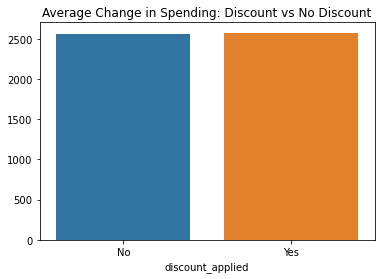

In [7]:
sns.barplot(x=spending_comparison.index, y=spending_comparison.values)
plt.title('Average Change in Spending: Discount vs No Discount')
plt.show()


In [8]:
df['order_segment'] = pd.cut(df['order_count_before'], bins=[0, 5, 10, 20], labels=['Low', 'Medium', 'High'])


In [9]:
df

,customer_id,discount_applied,order_count_before,order_count_after,total_spend_before,total_spend_after,spend_change,order_segment
0,1286,No,4,11,1736.119038,3601.461583,1865.342545,Low
1,1563,Yes,10,2,923.649992,387.822968,-535.827024,Medium
2,1289,No,2,8,3526.359734,9705.813801,6179.454067,Low
3,1053,No,4,3,1683.084961,326.592907,-1356.492055,Low
4,1516,Yes,19,2,3746.981815,6747.656727,3000.674912,High
...,...,...,...,...,...,...,...,...
495,1196,No,1,10,4319.434247,1123.896105,-3195.538143,Low
496,1047,Yes,14,29,1714.060995,4410.847943,2696.786948,High
497,1686,No,12,7,1468.770840,1755.649592,286.878752,High
498,1024,Yes,12,14,4785.734195,9250.403991,4464.669797,High


# Identify responsive segments


In [10]:
segment_analysis = df.groupby(['order_segment', 'discount_applied'])['spend_change'].mean()


In [11]:
segment_analysis

order_segment  discount_applied
Low            No                  2300.020216
               Yes                 2492.819531
Medium         No                  2884.933381
               Yes                 3091.663485
High           No                  2513.767714
               Yes                 2368.595775
Name: spend_change, dtype: float64

# Visualize segment analysis


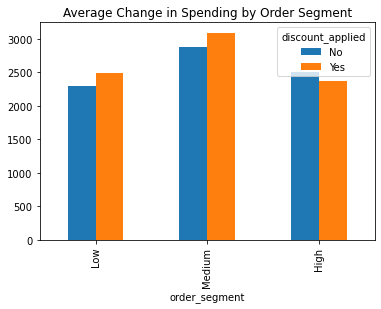

In [12]:
segment_analysis.unstack().plot(kind='bar')
plt.title('Average Change in Spending by Order Segment')
plt.show()
